# Task 3: The Sparks Foundation MAY'21
**Topic: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’**

**Description**: As a business manager, try to find out the weak areas where you can
                 work to make more profit. What all business problems you can derive by exploring the data?
          
**Dataset Used**: https://bit.ly/3i4rbWl

**Done By** : Subham Saha, Data Science and Business Analytics Intern May'21 

**Q- What is EDA?**

It is nothing but a data exploration technique to understand various aspects of data.

**Q- Objectives of EDA?**

It is basically used to filter the data from redundancies null values, unnecessary variables.

**Q-Steps involved in EDA?**

1.Understand the data

2.Clean the data

3.Analysis of relationship between variables.



# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url= "E:/Python projects/TSF/SampleSuperstore.csv"
superstore = pd.read_csv(url)
superstore.head() # first 5 rows

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
superstore.tail() # last 5 rows

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [4]:
superstore.shape # total rows and columns

(9994, 13)

In [5]:
superstore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
superstore.info() # checking for null values and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
superstore.describe() 

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

**Inference: From the quantiles and max values of Sales and Profit, it was observed that outliers are present in dataset.**

In [8]:
superstore.nunique() # unique values in each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
superstore['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [10]:
superstore['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
# Cleaning data

superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
superstore=superstore.copy()
superstore_new= superstore.drop(['Postal Code','City','Country'],axis=1)
superstore_new.head()

Ship Mode    Segment       State Region         Category Sub-Category  \
0    Second Class   Consumer    Kentucky  South        Furniture    Bookcases   
1    Second Class   Consumer    Kentucky  South        Furniture       Chairs   
2    Second Class  Corporate  California   West  Office Supplies       Labels   
3  Standard Class   Consumer     Florida  South        Furniture       Tables   
4  Standard Class   Consumer     Florida  South  Office Supplies      Storage   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

In [13]:
superstore_new.duplicated().sum()

137

In [14]:
superstore_new[superstore_new.duplicated()==True]

Ship Mode      Segment         State   Region         Category  \
595   Standard Class     Consumer    California     West       Technology   
903   Standard Class     Consumer    California     West  Office Supplies   
950   Standard Class  Home Office  Pennsylvania     East  Office Supplies   
1878  Standard Class     Consumer    California     West       Technology   
1890  Standard Class    Corporate    California     West  Office Supplies   
...              ...          ...           ...      ...              ...   
9688  Standard Class     Consumer      Virginia    South  Office Supplies   
9759  Standard Class    Corporate    California     West        Furniture   
9855  Standard Class     Consumer    California     West  Office Supplies   
9951    Second Class    Corporate       Indiana  Central  Office Supplies   
9986  Standard Class     Consumer    California     West       Technology   

     Sub-Category     Sales  Quantity  Discount    Profit  
595       Copiers  1199.976         3       0.2  434.9913  
903         Paper    20.040         3       0.0    9.6192  
950         Paper    15.552         3       0.2    5.4432  
1878       Phones   302.376         3       0.2   22.6782  
1890        Paper    10.560         2       0.0    4.7520  
...           ...       ...       ...       ...       ...  
9688        Paper    32.400         5       0.0   15.5520  
9759       Chairs  1403.920         5       0.2   70.1960  
9855        Paper    24.560         2       0.0   11.5432  
9951      Binders    17.380         2       0.0    8.6900  
9986  Accessories    36.240         1       0.0   15.2208  

[137 rows x 10 columns]

In [15]:
superstore_new.drop_duplicates(keep='first',inplace=True)

In [16]:
superstore_new.shape

(9857, 10)

<AxesSubplot:>

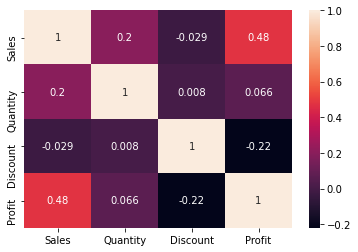

In [17]:
#Relationship analysis

correlation= superstore_new.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

**Inference: From the heat map, it was observed that Quantity and Profit both are strongly and positively correlated with
    Sales. And Discount and Profit are negatively correlated.**

# Univariate Analysis

In [18]:
len(superstore_new['Segment'])

9857

In [19]:
superstore_new['Segment'].value_counts()

Consumer       5107
Corporate      2979
Home Office    1771
Name: Segment, dtype: int64

In [20]:
superstore_new_seg= superstore_new['Segment'].value_counts()/len(superstore_new['Segment'])*100  #Converted to percentage
superstore_new_seg

Consumer       51.810896
Corporate      30.222177
Home Office    17.966927
Name: Segment, dtype: float64

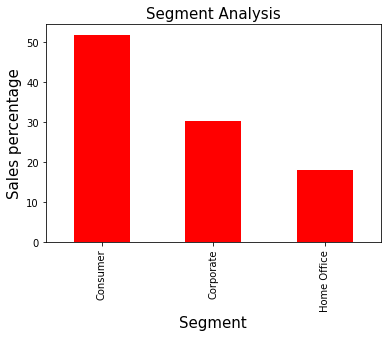

In [21]:
#Segment Analysis
ax=superstore_new_seg.plot(kind='bar',color='red')
plt.xlabel('Segment',fontsize=15)
plt.ylabel('Sales percentage',fontsize=15)
ax.set_title("Segment Analysis",fontsize=15)
plt.show()

**Inference: Home office segment is way behind consumers.**

In [22]:
superstore_state= superstore_new['State'].value_counts()

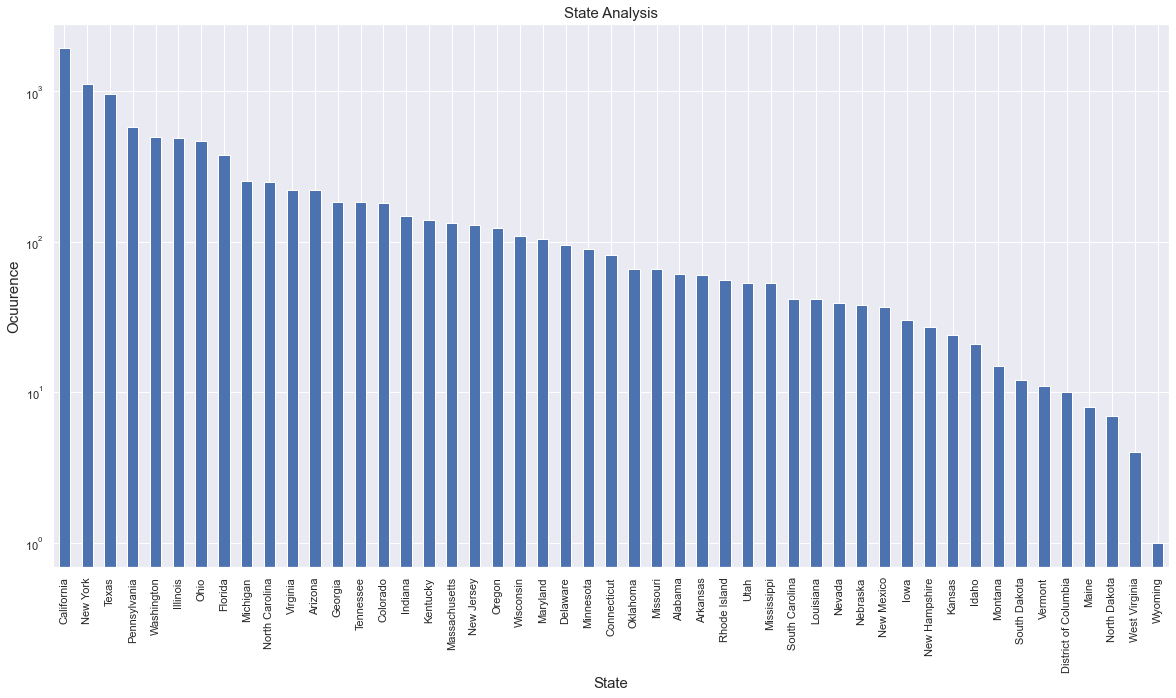

In [23]:
# State Analysis
sns.set()
plt.figure(figsize=(20,10))
superstore_state.plot(kind='bar',logy= True)
plt.xlabel('State',fontsize=15)
plt.ylabel('Ocuurence',fontsize=15)
plt.title('State Analysis',fontsize=15)
plt.show()

**Inference: From the states it was observed that from Minnesota to Wyoming sales  are pretty low.**

In [24]:
superstore_new_region= superstore_new['Region'].value_counts()/len(superstore_new['Region'])*100
superstore_new_region

West       31.723648
East       28.669981
Central    23.222076
South      16.384295
Name: Region, dtype: float64

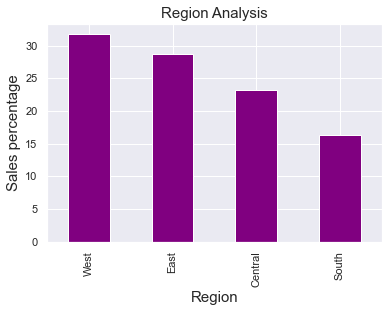

In [25]:
# Region Analysis
sns.set()
superstore_new_region.plot(kind='bar',color='purple')
plt.xlabel("Region",fontsize=15)
plt.ylabel("Sales percentage",fontsize=15)
plt.title("Region Analysis",fontsize=15)
plt.show()

**Inference: South region performance has a very low performace compare to others.So, this region is the weakest area.**

In [26]:
superstore_new_cat= superstore_new['Category'].value_counts()/len(superstore_new['Category'])*100

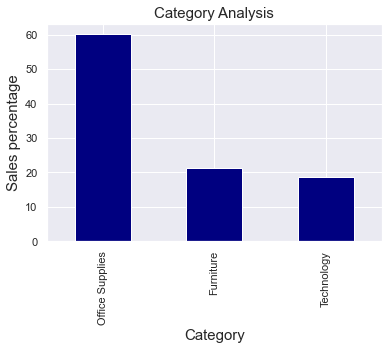

In [27]:
# Category Analysis
sns.set()
superstore_new_cat.plot(kind="bar",color='Navy')
plt.xlabel("Category",fontsize=15)
plt.ylabel("Sales percentage",fontsize=15)
plt.title("Category Analysis",fontsize=15)
plt.show()

**Inference: Major selling is coming from Office Supplies, Furniture and Technology has shown a poor performance.**

In [28]:
superstore_new__subcat= superstore_new['Sub-Category'].value_counts()/len(superstore_new['Sub-Category'])*100
superstore_new__subcat

Binders        15.339353
Paper          13.168307
Furnishings     9.617531
Phones          8.958101
Storage         8.542153
Art             7.994319
Accessories     7.831998
Chairs          6.178350
Appliances      4.727605
Labels          3.581211
Tables          3.236279
Envelopes       2.576849
Bookcases       2.282642
Fasteners       2.201481
Supplies        1.927564
Machines        1.156539
Copiers         0.679720
Name: Sub-Category, dtype: float64

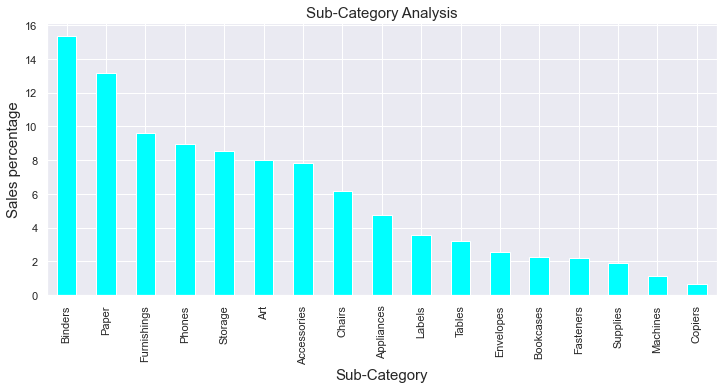

In [29]:
# Sub-Category Analysis
plt.figure(figsize=(12,5))
superstore_new__subcat.plot(kind="bar",color="cyan")
plt.xlabel("Sub-Category",fontsize=15)
plt.ylabel("Sales percentage",fontsize=15)
plt.title("Sub-Category Analysis",fontsize=15)
plt.show()

**Inference: Approximately 70% of items are covered by Binders,Papers,Furnishings,Phones,Storage,Art and Accessories.**


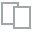
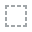
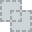
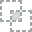
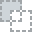
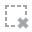
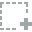
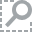
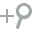
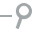
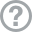
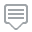
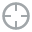
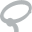
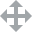
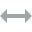
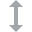
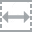
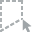
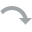
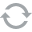
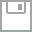
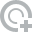
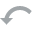
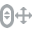
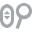
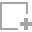
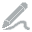
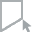
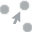
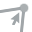
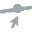

In [30]:
from dataprep.eda import plot
plot(superstore_new)

# Bivariate Analysis


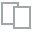
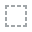
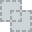
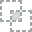
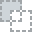
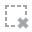
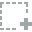
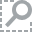
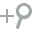
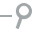
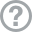
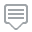
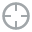
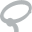
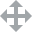
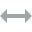
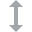
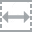
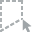
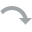
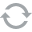
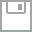
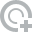
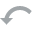
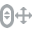
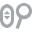
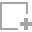
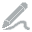
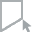
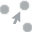
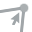
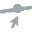

In [31]:
#Region vs Category
plot(superstore_new,'Region','Category')

**Inference: Office supplies has the most number of sales in all the regions.**

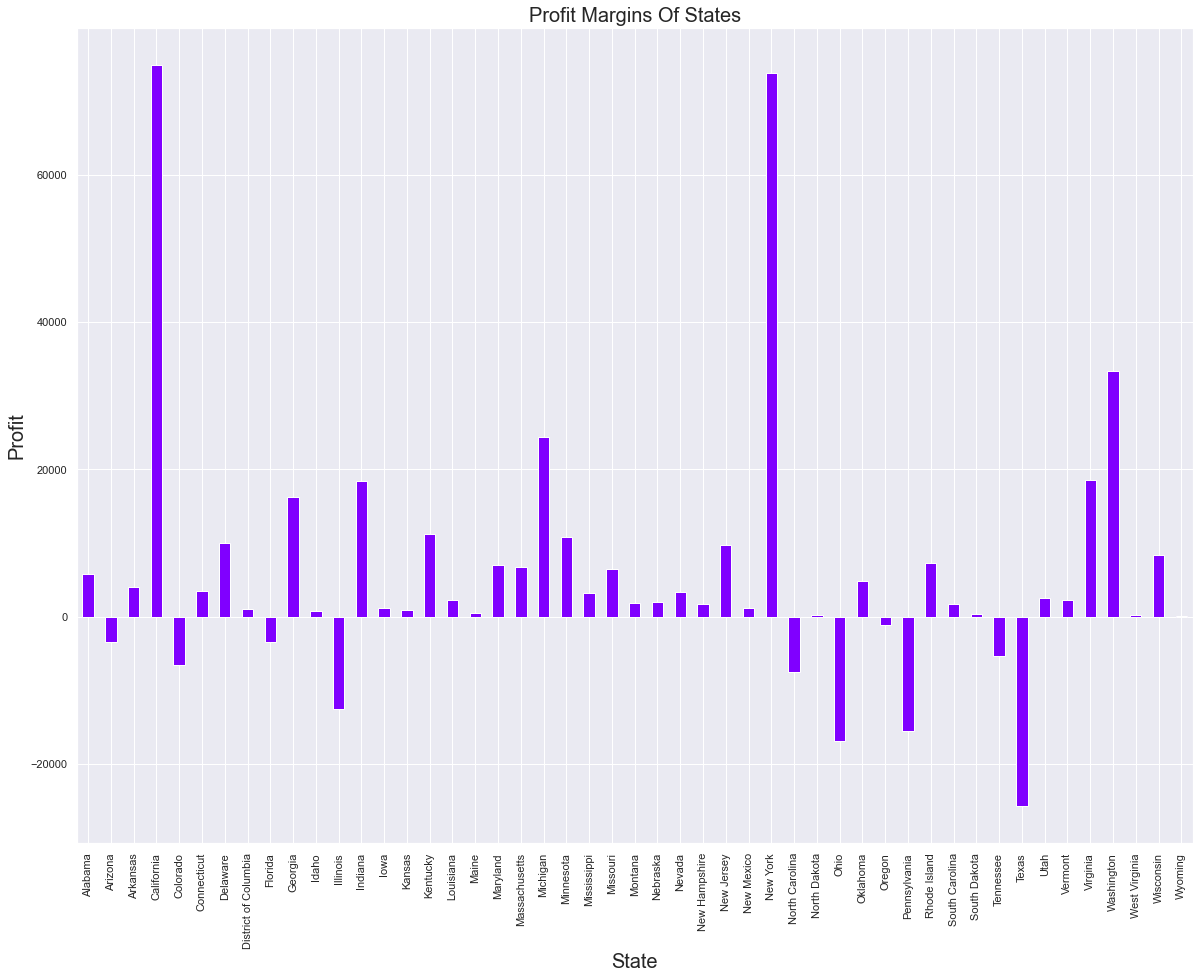

In [32]:
#Profit margin of States
superstore_new.groupby('State')['Profit'].sum().plot.bar(figsize=(20,15),cmap='rainbow')
plt.ylabel('Profit',fontsize=20)
plt.xlabel('State',fontsize=20)
plt.title("Profit Margins Of States",fontsize=20)
plt.show()

**Inference: California and New York are the 2 states which made huge profit compare to other states and Texas and Ohio are the
    states which had faced huge losses.**

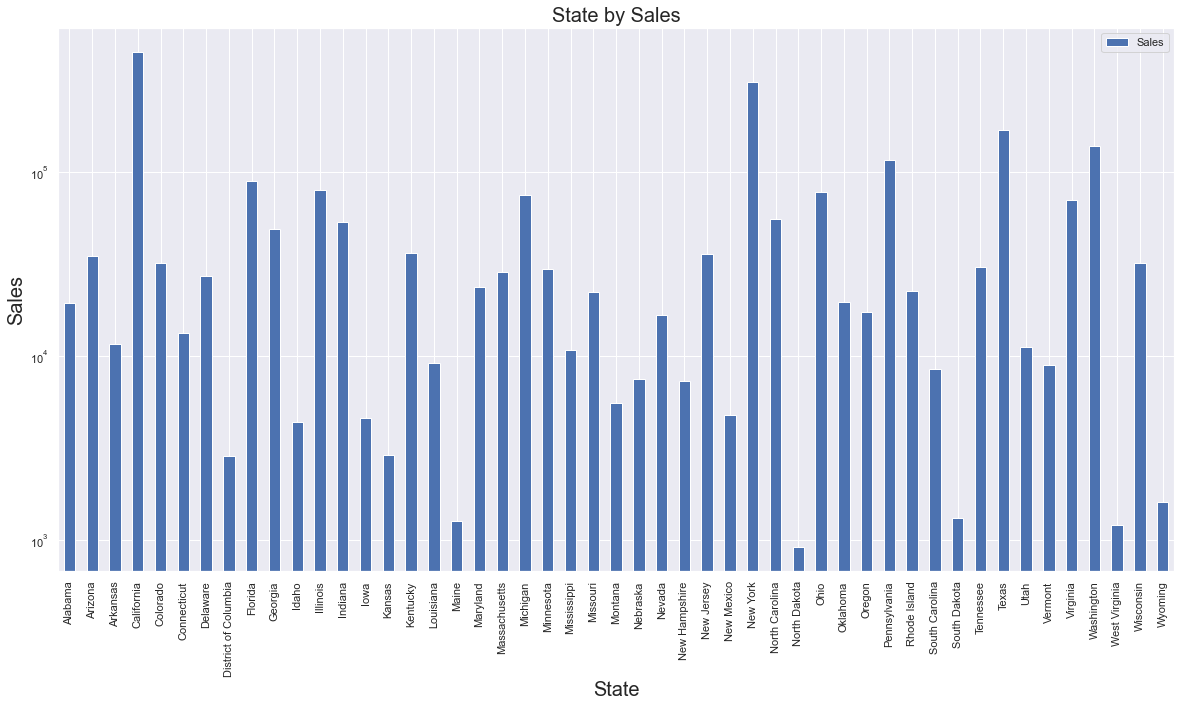

In [43]:
# State wise Sales
superstore_new.groupby('State')[['Sales']].sum().plot.bar(figsize=(20,10),logy=True)
plt.ylabel('Sales',fontsize=20)
plt.xlabel('State',fontsize=20)
plt.title("State by Sales",fontsize=20)
plt.show()

**Inference: California and New york had the most number of sales and from the down side North Dakota and West Virginia had 
    the least number of sales.**

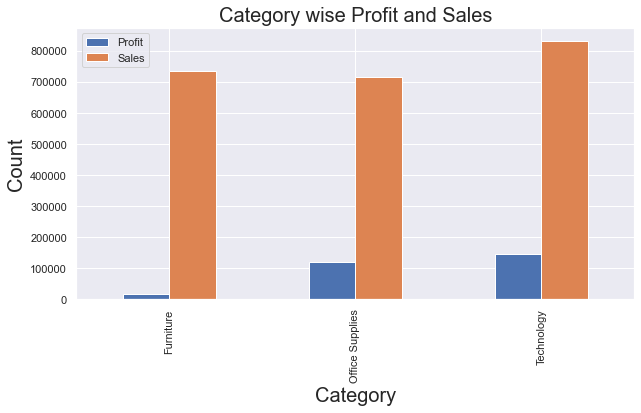

In [34]:
# Category Vs Profit,Sales
superstore_new.groupby('Category')[['Profit','Sales']].sum().plot.bar(figsize=(10,5))
plt.ylabel('Count',fontsize=20)
plt.xlabel('Category',fontsize=20)
plt.title("Category wise Profit and Sales",fontsize=20)
plt.show()

**Inference: Technology brings the most profit and Furniture the least.**

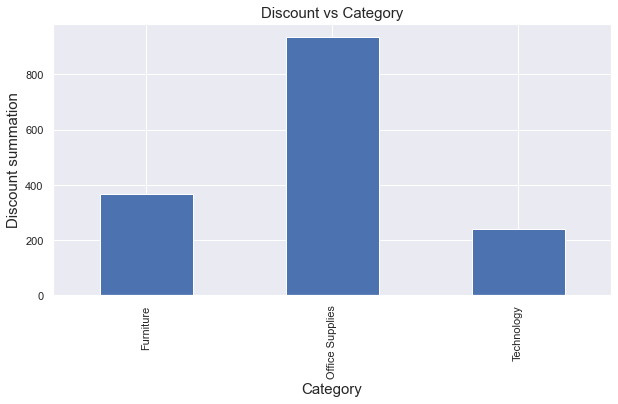

In [57]:
superstore_new.groupby('Category')["Discount"].sum().plot.bar(figsize=(10,5))
plt.ylabel('Discount summation',fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.title("Discount vs Category",fontsize=15)
plt.show()

**Inference: More discount is availed by Office Supplies.** 

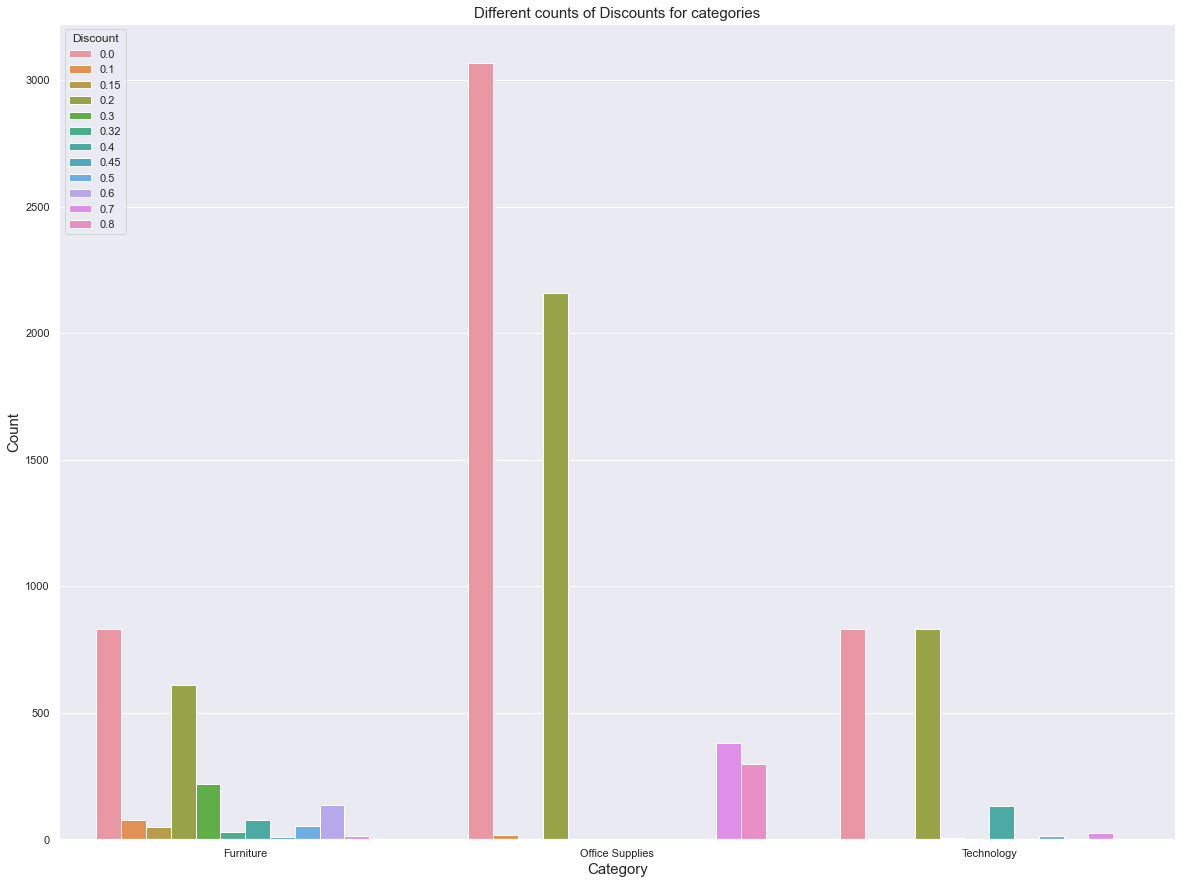

In [80]:
plt.figure(figsize=(20,15))
sns.countplot(x=superstore_new['Category'],hue= superstore_new['Discount'])
plt.xlabel("Category",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Different counts of Discounts for categories",fontsize=15)
plt.show()


**Inference: Office supplies is getting most number of discounts.**

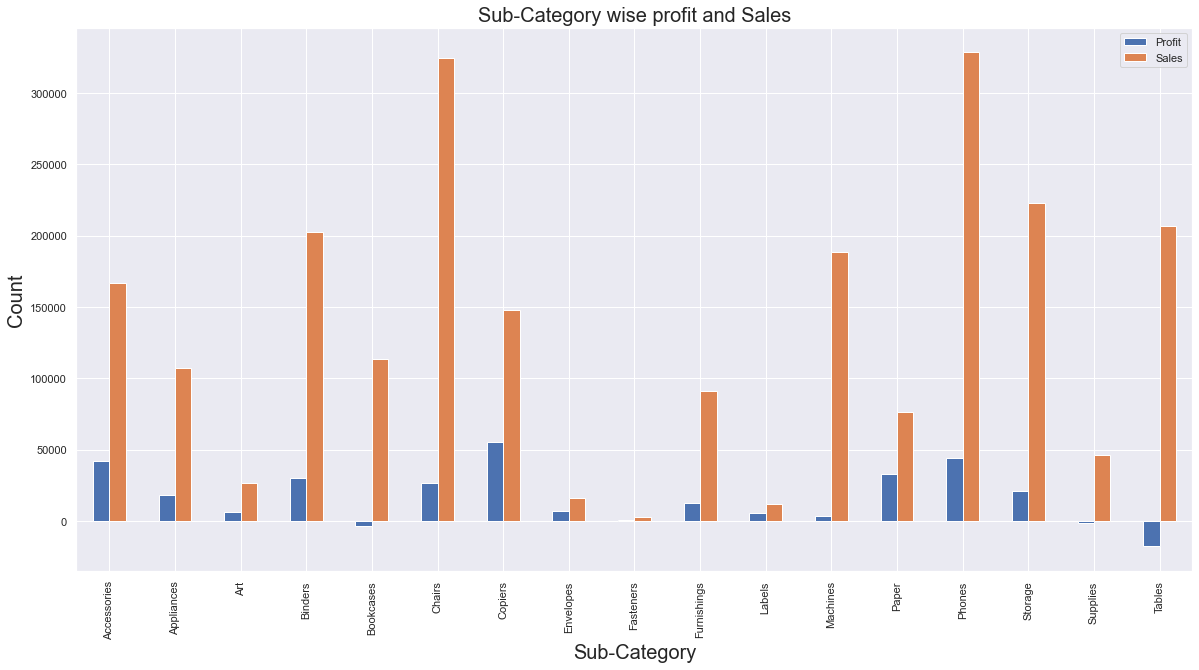

In [35]:
# Sub-Category wise Profit and Sales
superstore_new.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(figsize=(20,10))
plt.ylabel('Count',fontsize=20)
plt.xlabel('Sub-Category',fontsize=20)
plt.title("Sub-Category wise profit and Sales",fontsize=20)
plt.show()

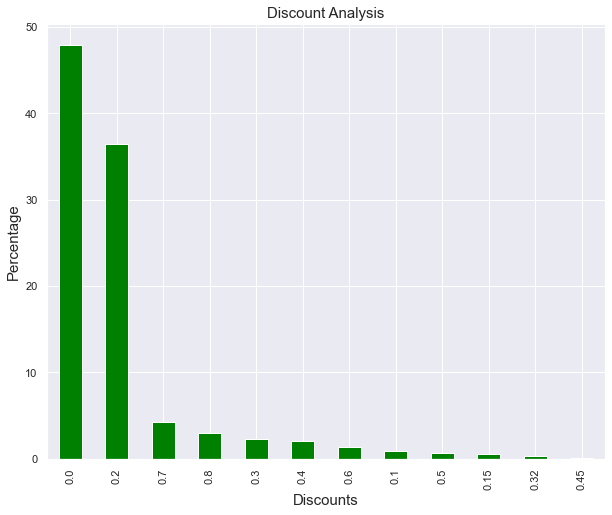

In [36]:
# Percentages of discounts given
plt.figure(figsize=(10,8))
disc= superstore_new['Discount'].value_counts()/len(superstore_new['Discount'])*100
disc.plot(kind='bar',color='green')
plt.xlabel("Discounts",fontsize=15)
plt.ylabel("Percentage",fontsize=15)
plt.title("Discount Analysis",fontsize=15)
plt.show()

**Inference: Total 85% is covered by No Discount and 20% .**

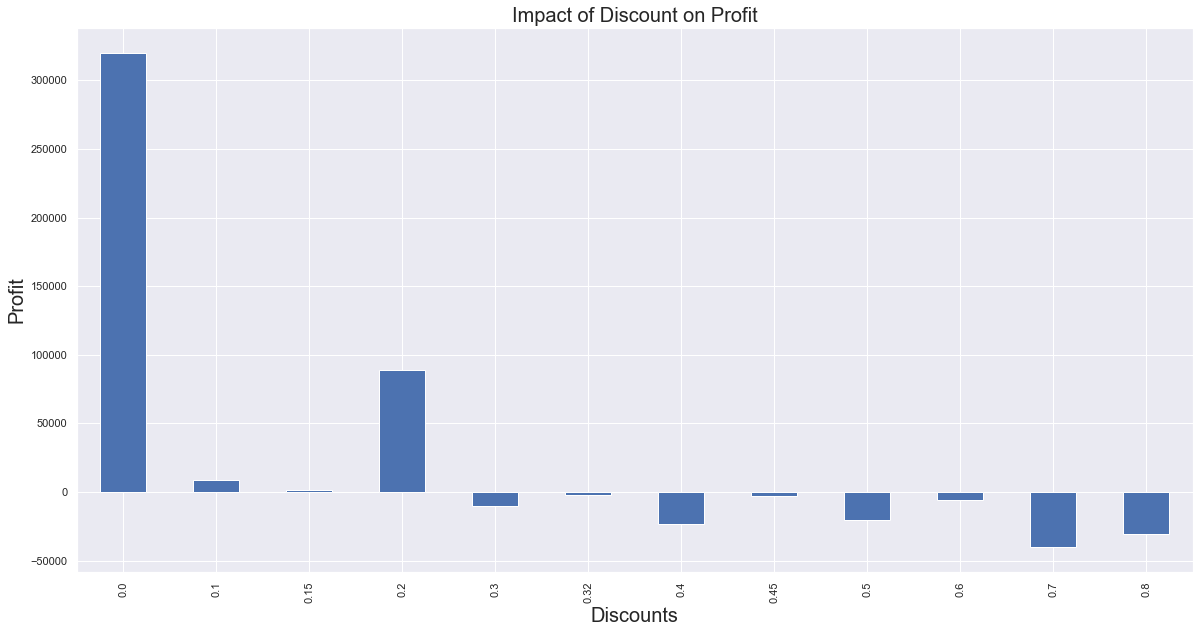

In [37]:
#Impact of Discount on Profit
superstore_new.groupby('Discount')['Profit'].sum().plot.bar(figsize=(20,10))
plt.xlabel("Discounts",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Impact of Discount on Profit",fontsize=20)
plt.show()


**Inference: From 30% onwards there is a trend of loss.**

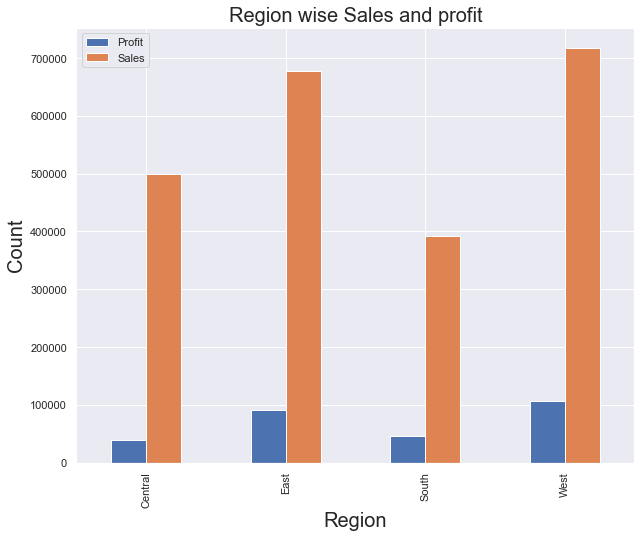

In [38]:
#Region wise Sales and profit
superstore_new.groupby('Region')[['Profit','Sales']].sum().plot.bar(figsize=(10,8))
plt.xlabel("Region",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Region wise Sales and profit",fontsize=20)
plt.show()

**Inference: West Region has most number of Sales and Profit, while Central protruding the least profit. Also there is a
    need of increase in amount of sales in South Region as it has potential to bring more profit.**

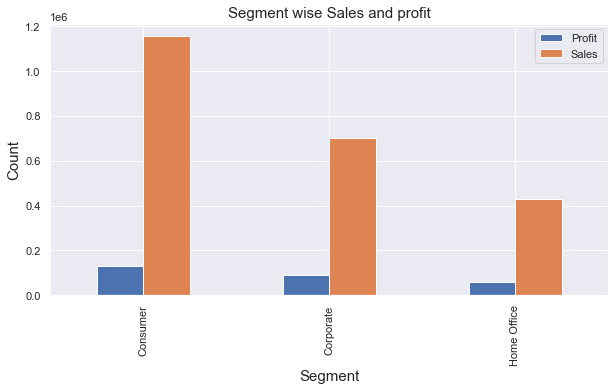

In [39]:
#Segment wise Sales and profit
superstore_new.groupby('Segment')[['Profit','Sales']].sum().plot.bar(figsize=(10,5))
plt.xlabel("Segment",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Segment wise Sales and profit",fontsize=15)
plt.show()

**Inference: Consumer segment has the highest number of Sales and Profit while Home Office being the poor performer.**

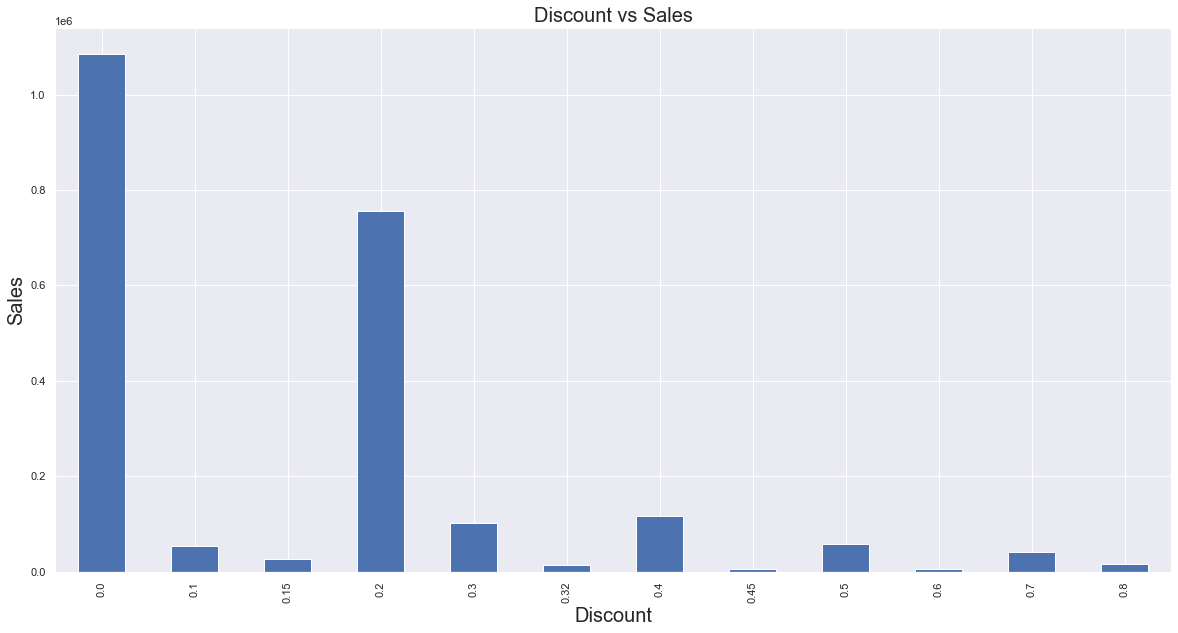

In [40]:
# Discount vs Sales
superstore_new.groupby('Discount')['Sales'].sum().plot.bar(figsize=(20,10))
plt.xlabel("Discount",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.title("Discount vs Sales",fontsize=20)
plt.show()

**Inference: With 0% and 20% Discount, Sales saw the highest numbers.**

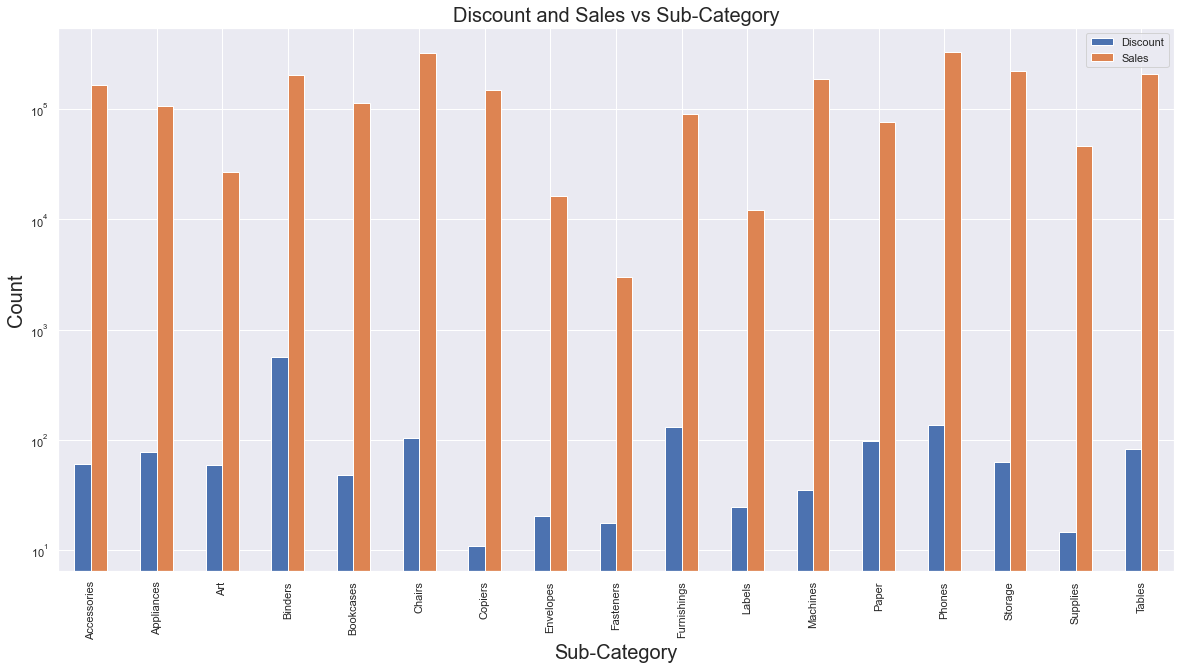

In [41]:
# Discount and Sales vs Sub-Category
superstore_new.groupby('Sub-Category')[['Discount','Sales']].sum().plot.bar(figsize=(20,10),logy=True)
plt.xlabel("Sub-Category",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Discount and Sales vs Sub-Category",fontsize=20)
plt.legend()
plt.show()

**Inference: More discount does not mean more sales.**

# Conclusion

Weak Areas:
    
    1. Region wise Technology has the less number of sales.
    
    2. States like Texas, Pennsylvenia, Ohio and Illinios poses the huge loss.
    
    3. Maine, North and South Dakota, West Virgina had the fewer number of Sales.
    
    4. In Category Office supplies grabs the most number of discounts. But Technology has highest number of Sales and profit
       so,if more discounts of maximum 20% is given the sales can go higher than present situation.
        
    5. In Sub-Category Tables and Bookcases faced the losses.So, as a manager discounts can be cutted down for both cases to
       cover down losses.
        
    6. After analysing Discounts, till 20% Discount gives profit but after that a trend of loss starts.So, better to avoid
       30% and above discounts.
        
    7. In Central Region , there is a need of reducing discounts, as their sales are high compare to South Region but
       profit is low.
        
    8. Fasteners, Labels, Envelopes need more Sales because presently comparing to their sales, profit margin
       is quite good and it has the potential to go more high.
       
       